## Using PyTorch to build Neural Networks

In this notebook, we will leveraging the PyTorch Neural Network module (`torch.nn`)

In [96]:
from IPython.display import Image as IPythonImage
%matplotlib inline

import torch
import numpy as np
import matplotlib.pyplot as plt

### Building a linear regression model

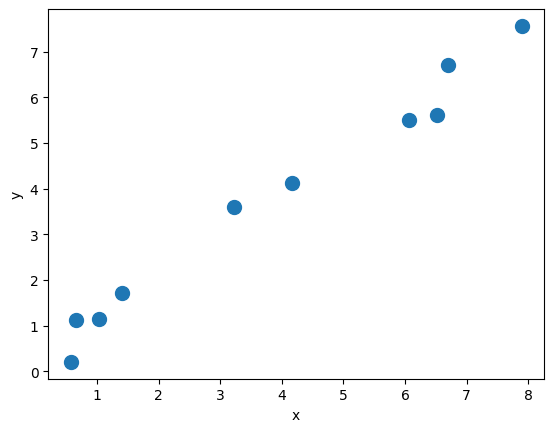

In [111]:

X_train = np.random.uniform(0, 9, size=(10, 1)).reshape(-1, 1).astype('float32')
noise = np.random.normal(0, 0.5, size=(10, 1)).astype('float32')

y_train = 1.0*X_train+noise


plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [112]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)

# On some computers the explicit cast to .float() is
# necessary
y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [121]:
torch.manual_seed(1) # sets the seed to generate random numbers

#------------------------------------------------------------------------------------------------
# Initialize the weights
weight = torch.randn(1) # argument specify shape of the tensor

# The following sets the requires_grad attribute of the tensor to True;
# PyTorch will track operations on this tensor, and gradients will be computed for it during backpropagation
weight.requires_grad_() # You want to optimize the parameter 'weight'

# Initialize the bias tensor filled with zeros with a shape of (1,), and it sets requires_grad=True
bias = torch.zeros(1, requires_grad=True)

# Try also weight = torch.randn(1, requires_grad=True)
#------------------------------------------------------------------------------------------------


def loss_fn(input, target):
    return (input-target).pow(2).mean()

def model(xb):
    # The @ operator denotes matrix multiplication (see PEP 465) / more readable than torch.matmul()
    return xb @ weight + bias

learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward() # After calling loss.backward(), the gradients are computed and stored in the .grad attributes of the tensors

        with torch.no_grad(): #  used to disable temporarily gradient tracking during the parameter update, memory efficiency
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate

            # Zeroing gradients after updating; essential to reset their gradients to zero for the next iteration of the training loop
            # By default, PyTorch accumulates gradients. If you don’t zero the gradients, they will accumulate over multiple iterations (batches)
            weight.grad.zero_()
            bias.grad.zero_()

    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}') # item() method used to retrieve the value of a scalar tensor as a standard Python number


Epoch 0  Loss 3.2491
Epoch 10  Loss 9.5311
Epoch 20  Loss 1.8302
Epoch 30  Loss 13.0783
Epoch 40  Loss 3.4575
Epoch 50  Loss 0.3961
Epoch 60  Loss 1.6141
Epoch 70  Loss 0.5764
Epoch 80  Loss 0.7580
Epoch 90  Loss 0.3296
Epoch 100  Loss 0.0244
Epoch 110  Loss 0.2675
Epoch 120  Loss 0.1756
Epoch 130  Loss 0.1116
Epoch 140  Loss 0.0611
Epoch 150  Loss 0.4222
Epoch 160  Loss 0.1603
Epoch 170  Loss 0.0001
Epoch 180  Loss 0.0000
Epoch 190  Loss 0.2067


Final Parameters: 2.402, 3.662


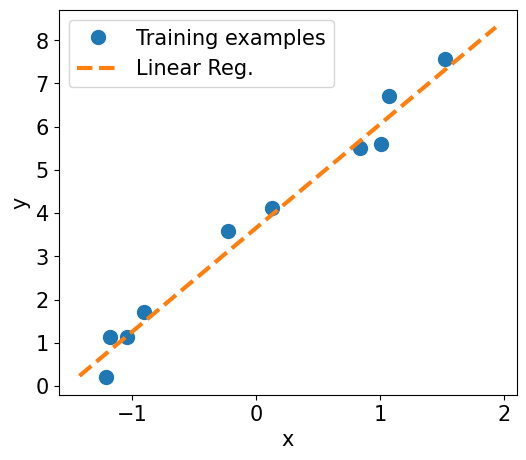

In [122]:
print(f"Final Parameters: {weight.item():1.3f}, {bias.item():1.3f}")

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

**Model training via `torch.nn` and `torch.optim` modules**

In [123]:
import torch.nn as nn

input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)

loss_fn = nn.MSELoss(reduction='mean')

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. Generate predictions
        pred = model(x_batch)[:,0]

        # 2. Calculate loss
        loss = loss_fn(pred, y_batch)

        # 3. Compute gradients
        loss.backward()

        # 4. Update parameters using gradients
        optimizer.step()

        # 5. Reset the gradients to zero
        optimizer.zero_grad()

    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 17.9522
Epoch 10  Loss 8.9156
Epoch 20  Loss 6.3410
Epoch 30  Loss 9.6754
Epoch 40  Loss 0.1053
Epoch 50  Loss 0.3994
Epoch 60  Loss 2.0257
Epoch 70  Loss 1.2291
Epoch 80  Loss 0.1314
Epoch 90  Loss 0.1462
Epoch 100  Loss 1.5340
Epoch 110  Loss 1.0811
Epoch 120  Loss 0.0819
Epoch 130  Loss 0.0937
Epoch 140  Loss 0.0902
Epoch 150  Loss 0.0873
Epoch 160  Loss 0.0849
Epoch 170  Loss 0.0831
Epoch 180  Loss 0.1328
Epoch 190  Loss 0.0178


Final Parameters:, 2.3820, 3.6597


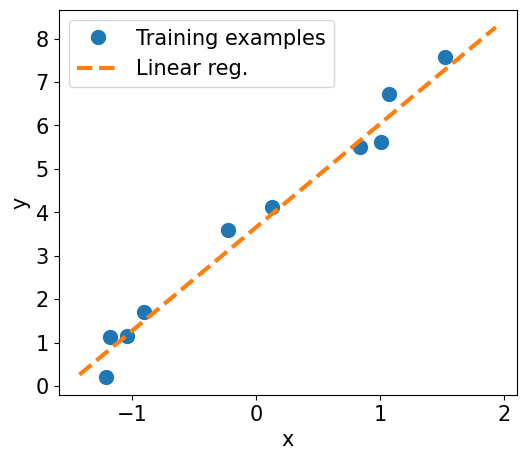

In [125]:
print(f"Final Parameters:, {model.weight.item():1.4f}, {model.bias.item():1.4f}")

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach() #  detach() creates a new tensor deached from the computation graph; it shares the same data as the original tensor but does not require gradients


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm.detach().numpy(), y_train.detach().numpy(), 'o', markersize=10)
plt.plot(X_test_norm.detach().numpy(), y_pred.detach().numpy(), '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)


plt.show()




---



### Exercise: train a regression model for the following polynomial *dataset*

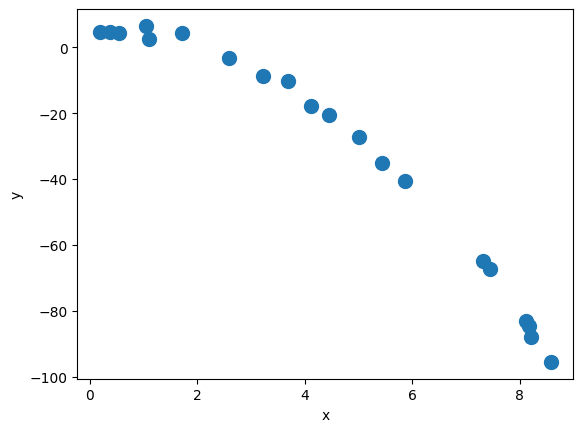

(20, 1) (20, 1)


In [179]:
X_train = np.random.uniform(0, 9, size=(20, 1)).reshape(-1, 1).astype('float32')
noise = np.random.normal(0, 2., size=(20, 1)).astype('float32')

b = 5
a1 = 1.0
a2 = -1.5

y_train =  b + a1*X_train + a2*X_train**2 + noise


plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

print(np.shape(X_train), np.shape(y_train))

In [186]:
### Augment training dataset

# Create the squared feature
X_train_squared = X_train ** 2

# Concatenate the original and squared features
X_train_augmented = np.concatenate((X_train, X_train_squared), axis=1)


print(np.shape(X_train), np.shape(X_train_augmented), np.shape(y_train))
print(type(X_train_augmented), type(y_train))

print(X_train_augmented)
print(y_train)

(20, 1) (20, 2) (20, 1)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[[3.6971023e+00 1.3668566e+01]
 [2.5924151e+00 6.7206159e+00]
 [1.7106174e+00 2.9262121e+00]
 [4.4485321e+00 1.9789438e+01]
 [1.0566994e+00 1.1166136e+00]
 [5.8612099e+00 3.4353783e+01]
 [5.0129032e+00 2.5129198e+01]
 [4.1142840e+00 1.6927334e+01]
 [8.1670504e+00 6.6700714e+01]
 [5.4450302e+00 2.9648354e+01]
 [7.3200064e+00 5.3582493e+01]
 [1.8971516e-01 3.5991844e-02]
 [3.2271910e+00 1.0414762e+01]
 [1.0966786e+00 1.2027040e+00]
 [3.7323686e-01 1.3930576e-01]
 [5.5195135e-01 3.0465028e-01]
 [8.5755568e+00 7.3540176e+01]
 [8.2034693e+00 6.7296906e+01]
 [8.1086893e+00 6.5750839e+01]
 [7.4474616e+00 5.5464684e+01]]
[[-10.168093 ]
 [ -3.342952 ]
 [  4.270904 ]
 [-20.68957  ]
 [  6.471923 ]
 [-40.42842  ]
 [-27.326048 ]
 [-17.681248 ]
 [-84.60758  ]
 [-35.15306  ]
 [-64.794914 ]
 [  4.632539 ]
 [ -8.622368 ]
 [  2.5686972]
 [  4.7782083]
 [  4.4388986]
 [-95.47153  ]
 [-87.987686 ]
 [-83.047005 ]
 [-67.42476  ]]


In [190]:
# Normalize each feature independently
mean_poly = np.mean(X_train_augmented, axis=0)
std_poly = np.std(X_train_augmented, axis=0)

print(np.shape(mean_poly), np.shape(std_poly))

X_train_norm = (X_train_augmented - mean_poly) / std_poly
X_train_norm = torch.from_numpy(X_train_norm)  # Convert to PyTorch tensor

print(np.shape(X_train_norm), np.shape(y_train))
print(type(X_train_norm), type(y_train))

# On some computers the explicit cast to .float() is
# necessary
y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)


(2,) (2,)
torch.Size([20, 2]) (20, 1)
<class 'torch.Tensor'> <class 'numpy.ndarray'>


In [191]:
num_epochs = 1000
learning_rate = 0.005

input_size = 2
output_size = 1
model_poly = nn.Linear(input_size, output_size)

loss_fn = nn.MSELoss(reduction='mean')

optimizer = torch.optim.SGD(model_poly.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. Generate predictions
        pred = model_poly(x_batch)

        # 2. Calculate loss
        loss = loss_fn(pred, y_batch)

        # 3. Compute gradients
        loss.backward()

        # 4. Update parameters using gradients
        optimizer.step()

        # 5. Reset the gradients to zero
        optimizer.zero_grad()

    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 1.0935
Epoch 10  Loss 1.8734
Epoch 20  Loss 20.0987
Epoch 30  Loss 22.8540
Epoch 40  Loss 50.9385
Epoch 50  Loss 31.1394
Epoch 60  Loss 3.3539
Epoch 70  Loss 23.8737
Epoch 80  Loss 3.6509
Epoch 90  Loss 3.5304
Epoch 100  Loss 1.5616
Epoch 110  Loss 4.9347
Epoch 120  Loss 11.4694
Epoch 130  Loss 5.5005
Epoch 140  Loss 17.8583
Epoch 150  Loss 15.0121
Epoch 160  Loss 8.0781
Epoch 170  Loss 10.6154
Epoch 180  Loss 0.2392
Epoch 190  Loss 5.9762
Epoch 200  Loss 1.7804
Epoch 210  Loss 1.1383
Epoch 220  Loss 4.6339
Epoch 230  Loss 6.6497
Epoch 240  Loss 0.0078
Epoch 250  Loss 0.0055
Epoch 260  Loss 0.0016
Epoch 270  Loss 4.0013
Epoch 280  Loss 2.5242
Epoch 290  Loss 5.3732
Epoch 300  Loss 8.0769
Epoch 310  Loss 0.0477
Epoch 320  Loss 0.0122
Epoch 330  Loss 3.8620
Epoch 340  Loss 7.4204
Epoch 350  Loss 1.3296
Epoch 360  Loss 0.0001
Epoch 370  Loss 5.0748
Epoch 380  Loss 1.5636
Epoch 390  Loss 3.2236
Epoch 400  Loss 3.9023
Epoch 410  Loss 0.1289
Epoch 420  Loss 1.2289
Epoch 430  Lo

Final Parameters:, -31.6561, -26.9995


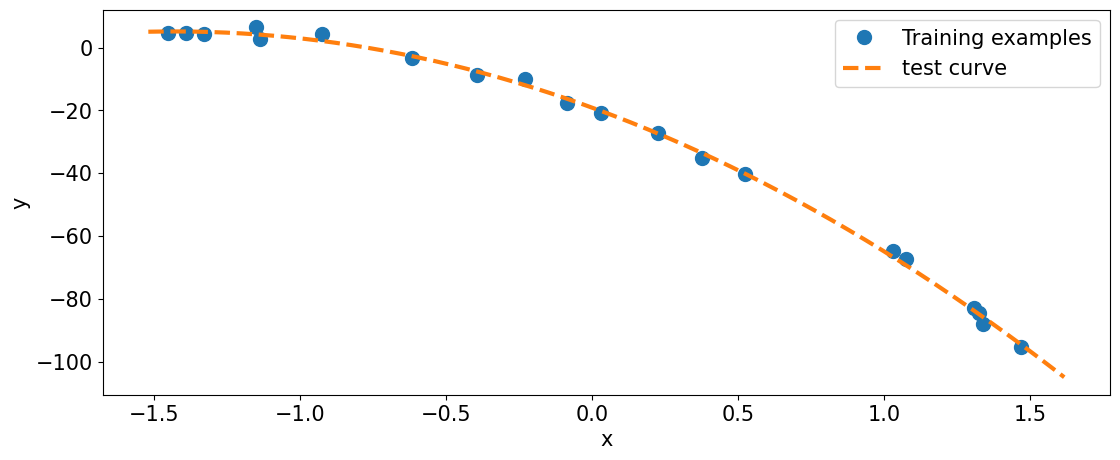

torch.Size([1000, 2]) torch.Size([1000, 1])


In [202]:
print(f"Final Parameters:, {model.weight.item():1.4f}, {model.bias.item():1.4f}")

X_test = np.linspace(0, 9, num=1000, dtype='float32').reshape(-1, 1)

# Create the squared feature
X_test_squared = X_test ** 2

# Concatenate the original and squared features
X_test_augmented = np.concatenate((X_test, X_test_squared), axis=1)

X_test_norm = (X_test_augmented - mean_poly) / std_poly
X_test_norm = torch.from_numpy(X_test_norm)
y_test_pred = model_poly(X_test_norm).detach() #  detach() creates a new tensor deached from the computation graph; it shares the same data as the original tensor but does not require gradients


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(X_train_norm.detach()[:,0].numpy(), y_train.detach().numpy(), 'o', markersize=10)
plt.plot(X_test_norm.detach()[:,0].numpy(), y_test_pred.detach().numpy(), '--', lw=3)
plt.legend(['Training examples', 'test curve'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)


plt.show()

print(np.shape(X_test_norm), np.shape(y_test_pred))




---



### Building an MLP for Classification

In [61]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1)

In [62]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [63]:
# For a list of all available layers http://pytorch.org/docs/stable/nn.html


class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x

input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3

model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

# Adam -Adaptive Moment Estimation- optimizer:
# It combines the benefits of AdaGrad and RMSProp
# More details can be found in https://github.com/cfteach/ml4hep/blob/main/gradient/gradient_descent.ipynb
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [64]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs


for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()

    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)




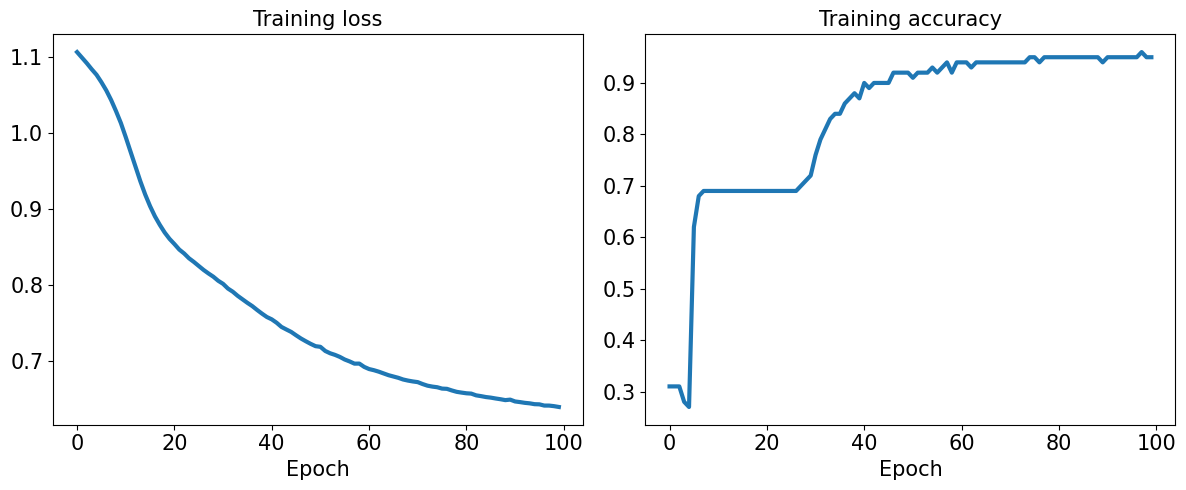

In [65]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

#plt.savefig('figures/12_09.pdf')

plt.show()

**Accuracy for test dataset**

In [66]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Acc.: {accuracy:.4f}')


Test Acc.: 0.9800


### Saving and reloading the trained model

In [67]:
path = 'iris_classifier.pt'
torch.save(model, path)

In [68]:
model_new = torch.load(path)
model_new.eval()

<ipython-input-68-ddbeb3503457>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_new = torch.load(path)


Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [69]:
pred_test = model_new(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


In [70]:
#if you want to save only the learned parameters

path = 'iris_classifier_state.pt'
torch.save(model.state_dict(), path)

In [71]:
model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))


<ipython-input-71-b21dbd0d4824>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_new.load_state_dict(torch.load(path))


<All keys matched successfully>

In [73]:
pred_test = model_new(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800




---



### Exercise: train a classification model with 2 (or more) hidden layers

In [91]:
# For a list of all available layers http://pytorch.org/docs/stable/nn.html


class Model2(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.layer3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Sigmoid()(x)
        x = self.layer3(x)
        x = nn.Softmax(dim=1)(x)
        return x

input_size = X_train_norm.shape[1]
hidden_size1 = 16
hidden_size2 = 8
output_size = 3

model2 = Model2(input_size, hidden_size1, hidden_size2, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

# Adam -Adaptive Moment Estimation- optimizer:
# It combines the benefits of AdaGrad and RMSProp
# More details can be found in https://github.com/cfteach/ml4hep/blob/main/gradient/gradient_descent.ipynb
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)


In [92]:
num_epochs = 100
loss_hist2 = [0] * num_epochs
accuracy_hist2 = [0] * num_epochs
accuracy_test_hist2 = [0] * num_epochs


for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model2(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_hist2[epoch] += loss.item()*y_batch.size(0)  # item() method used to retrieve the value of a scalar tensor as a standard Python number
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist2[epoch] += is_correct.sum()

    pred_test = model2(X_test_norm)
    is_correct_test = (torch.argmax(pred_test, dim=1) == y_test).float()
    accuracy_test_hist2[epoch] = is_correct_test.sum()/len(X_test)

    loss_hist2[epoch] /= len(train_dl.dataset)
    accuracy_hist2[epoch] /= len(train_dl.dataset)



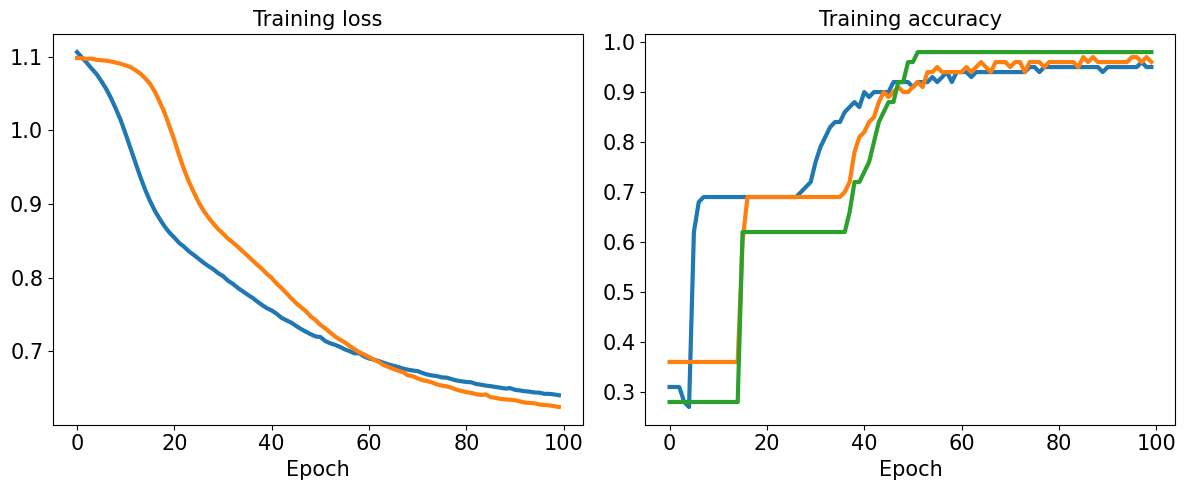

In [93]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.plot(loss_hist2, lw=3)


ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.plot(accuracy_hist2, lw=3)
ax.plot(accuracy_test_hist2, lw=3)

plt.tight_layout()

#plt.savefig('figures/12_09.pdf')

plt.show()

In [94]:
path2 = 'iris_classifier2.pt'
torch.save(model2, path2)

model_new2 = torch.load(path2)
model_new2.eval()


<ipython-input-94-c7c89b18bad7>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_new2 = torch.load(path2)


Model2(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=3, bias=True)
)

In [95]:
pred_test = model_new(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Acc.: {accuracy:.12f}')


pred_test = model_new2(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Acc.: {accuracy:.12f}')

Test Acc.: 0.980000019073
Test Acc.: 0.980000019073


### **Appendix**

### Choosing activation functions for MLP


**Logistic function recap**

In [ ]:
import numpy as np

X = np.array([1, 1.4, 2.5]) ## first value must be 1
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print(f'P(y=1|x) = {logistic_activation(X, w):.3f}')

P(y=1|x) = 0.888


In [ ]:
# W : array with shape = (n_output_units, n_hidden_units+1)
# note that the first column are the bias units

W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

# A : data array with shape = (n_hidden_units + 1, n_samples)
# note that the first column of this array must be 1

A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('Net Input: \n', Z)

print('Output Units:\n', y_probas)

Net Input: 
 [1.78 0.76 1.65]
Output Units:
 [0.85569687 0.68135373 0.83889105]


In [ ]:
y_class = np.argmax(Z, axis=0)
print('Predicted class label:', y_class)

Predicted class label: 0


**Estimating class probabilities in multiclass classification via the softmax function**

In [ ]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('Probabilities:\n', y_probas)

np.sum(y_probas)

Probabilities:
 [0.44668973 0.16107406 0.39223621]


1.0

In [ ]:
torch.softmax(torch.from_numpy(Z), dim=0)

tensor([0.4467, 0.1611, 0.3922], dtype=torch.float64)

**Broadening the output spectrum using a hyperbolic tangent**

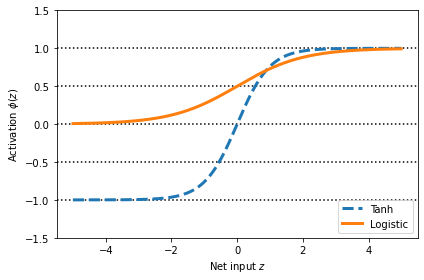

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('Net input $z$')
plt.ylabel('Activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act,
    linewidth=3, linestyle='--',
    label='Tanh')
plt.plot(z, log_act,
    linewidth=3,
    label='Logistic')
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()

In [ ]:
np.tanh(z)

array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])

In [ ]:
torch.tanh(torch.from_numpy(z))


tensor([-0.9999, -0.9999, -0.9999,  ...,  0.9999,  0.9999,  0.9999],
       dtype=torch.float64)

In [ ]:
from scipy.special import expit

expit(z)

array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383])

In [ ]:
torch.sigmoid(torch.from_numpy(z))

tensor([0.0067, 0.0067, 0.0068,  ..., 0.9932, 0.9932, 0.9933],
       dtype=torch.float64)

**Rectified linear unit activation**

In [ ]:
torch.relu(torch.from_numpy(z))

tensor([0.0000, 0.0000, 0.0000,  ..., 4.9850, 4.9900, 4.9950],
       dtype=torch.float64)